# Mauricio Torres

# Assignment 7
### Do any five.

## 1. 

- What is the expected value of a single die roll? 
- What is the expected value of rolling two dice and adding the results together?
- What is the expected winnings of any gamble in European roulette?

- Imagine you roll a die, and you record the value you get. But, if you roll a six, you roll again, and add that value. What is the expected value?
- Imagine that the process described in the last question continues until you fail to roll a six. What is the expected value of the process? (This can be tricky, you can simulate it to get an answer if you prefer. Hint: The answer is 4.2.)

In [3]:
#part a
import numpy as np

faces = np.array([1, 2, 3, 4, 5, 6])
p = np.repeat(1/6, 6)

E_single = np.sum(faces * p)
E_single

np.float64(3.5)

Expected value of a single die roll is 3.5

In [4]:
#part b
faces = np.array([1, 2, 3, 4, 5, 6])

sums = []
for x in faces:
    for y in faces:
        sums.append(x + y)

sums = np.array(sums)

E_two = np.mean(sums)
E_two

np.float64(7.0)

Since expectation is linear, the expected value of their sum is just the sum of their individual expectations, which gives me 7.

In [5]:
#part c
def roulette_ev(K):
    """
    Expected net payoff from betting $1 on K numbers in European roulette.
    """
    win_prob = K / 37
    payoff_if_win = 36 / K
    payoff_if_lose = 0
    cost = 1

    return win_prob * payoff_if_win + (1 - win_prob) * payoff_if_lose - cost

# try any K, they all give the same answer
roulette_ev(1)

-0.027027027027026973

Expected winnings are always a loss of about 2.7 cents per dollar.

In [6]:
#partd

E_single = np.mean([1, 2, 3, 4, 5, 6])
values = [1, 2, 3, 4, 5, 6 + E_single]

E_one_reroll = np.mean(values)
E_one_reroll


np.float64(4.083333333333333)

When I take the average of the five simple outcomes and the adjusted six outcome, the final expected value comes out to approximately 4.083.

Simulated value of the process: 4.19602


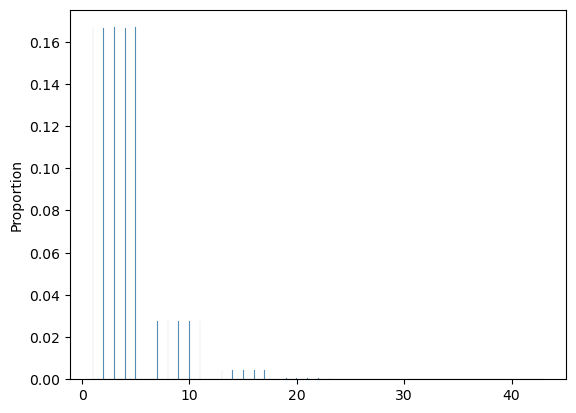

In [7]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

def simulate():
    sum = 0
    on = 1
    while on == 1:
        roll = rng.integers(1,7)
        sum += roll
        if( roll < 6 ):
            on = 0
    return sum

n_sample = 1000000
results = [simulate() for i in range(n_sample)]

sns.histplot(results,stat='proportion')

print(f'Simulated value of the process: {np.mean(results)}')

## 2. 
- Compute the expected value for a uniform random variable.
- Show that $\mathbb{E}[a+bX] = a + b\mathbb{E}[X]$
- Show, by example, that $v(\mathbb{E}[X]) \neq \mathbb{E}[v(X)]$, if $v(x) \neq a+bx$. For example, try $v(y) = y^2$ or $v(y)=\sqrt{y}$ with a Bernoulli or uniform or normally distributed random variable. This can be an important thing to remember: The expectation of a transformed random variable is not the transformation of the expected value.

In [8]:
#part a

sample = np.random.uniform(low=0, high=1, size=20000)
print("Sample mean of Uniform(0,1):", np.mean(sample))


Sample mean of Uniform(0,1): 0.4983108204260154


About 1/2

part b

You can show that $\mathbb{E}[a+bX] = a + b\mathbb{E}[X]$ by using the definition of expectation. 

The expected value of any function of a random variable is the integral of that function times its density. 

So,E[a+bX]=∫−∞∞(a+bx)f(x) dx


We can separate the constant and the linear term:
=a∫f(x) dx+b∫xf(x) dx


The first integral equals 1 because f(x)f(x)f(x) is a probability density, and the second integral is exactly the definition of E[X]. Putting this together gives
E[a+bX]=a+bE[X].

This shows that expectation is linear: adding a constant shifts the expectation, and multiplying the random variable by a constant scales the expectation by the same amount.

In [9]:
#partc

def v(x):
    return np.sqrt(x)

sample = np.random.uniform(low=0, high=1, size=20000)

Ev_of_sample = np.mean(v(sample))
print(f"E[v(X)] (from sample) = {Ev_of_sample}")
v_of_EX = v(np.mean(sample))
print(f"v(E[X]) (from sample) = {v_of_EX}")


E[v(X)] (from sample) = 0.6671787521403586
v(E[X]) (from sample) = 0.7075625120522778


I used a Uniform(0,1) random variable and the function v(x) = sqrt(x). I simulated a large sample, took the square root of each value, and averaged those results to get an estimate of E[v(X)]. Then I took the mean of the original sample and applied the square root to get v(E[X]). These two numbers are not the same. This shows that when the function is not linear, the average of the transformed values does not match the transformation applied to the average.

## 3. 
- Compute the variance for a uniform random variable.
- Show that 
$$
\mathbb{V}[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2
$$
$$
\mathbb{V}[a+bX] = b^2 \mathbb{V}[X]
$$
- Show that if $X$ is a normally distributed random variable, then $a + bX$ is distributed normally with mean $a+ b \mathbb{E}[X]$ and variance $b^2 \sigma_X^2$ 

These properties get used all the time!


In [10]:
#part a, variance of Uniform(0,1)

import numpy as np

sample = np.random.uniform(low=0, high=1, size=20000)

var_sample = np.var(sample)
print("Sample variance of Uniform(0,1):", var_sample)

Sample variance of Uniform(0,1): 0.08289561379555248


Variance is about 1/12

In [11]:
#part b
# 1.)
x = np.random.normal(loc=0, scale=2, size=20000)

EX = np.mean(x)
EX2 = np.mean(x**2)
var_direct = np.var(x)
var_formula = EX2 - EX**2

print("Var[X] from np.var:        ", var_direct)
print("E[X^2] - (E[X])^2 formula: ", var_formula)

# 2.)
a, b = 3.0, -1.5
y = a + b * x

var_y_direct = np.var(y)
var_y_formula = (b**2) * var_direct

print("Var[a + bX] from data:     ", var_y_direct)
print("b^2 * Var[X] formula:      ", var_y_formula)

Var[X] from np.var:         4.016661705277921
E[X^2] - (E[X])^2 formula:  4.016661705277922
Var[a + bX] from data:      9.037488836875324
b^2 * Var[X] formula:       9.037488836875323


Part b code just checks these formulas with simulated data and shows they match.

In [12]:
# part c, transforming a normal random variable

import numpy as np
mu_X = 2.0     
sigma_X = 1.5    

X = np.random.normal(loc=mu_X, scale=sigma_X, size=20000)

a = 1.0
b = -0.5
Y = a + b * X

mean_Y_sample = np.mean(Y)
var_Y_sample = np.var(Y)

print("Sample mean of Y:", mean_Y_sample)
print("Sample variance of Y:", var_Y_sample)

mean_Y_theory = a + b * mu_X
var_Y_theory = (b**2) * (sigma_X**2)

print("Theoretical mean of Y:", mean_Y_theory)
print("Theoretical variance of Y:", var_Y_theory)


Sample mean of Y: -0.0031610375760501084
Sample variance of Y: 0.5690008372551111
Theoretical mean of Y: 0.0
Theoretical variance of Y: 0.5625


## 4.

- The **covariance** of $X$ and $Y$ is
$$
\text{cov}(X,Y) = \int_{y} \int_{x} (x-\mathbb{E}[X])(y-\mathbb{E}[Y])f_{XY}(x,y) dxdy = \mathbb{E}_{XY}[ (x-\mu_X)(y-\mu_Y)]
$$
- Show that if $f_{XY}(x,y)=f_X(x)f_Y(y)$, then $\text{cov}(X,Y)=0$
- Provide an example (computation/simulation is fine) where $\text{cov}(X,Y)\approx 0$ but $f_{XY}(x,y)\neq 0$
- The covariance doesn't characterize joint random variables except in a few special cases: The covariance only captures the **linear** association between the two variables, not nonlinear associations.

## 5. 

Suppose $X$ has an expectation $\mathbb{E}[X]<\infty$ and variance $\mathbb{V}[X]<\infty$; this isn't always true, but is *usually* true
- Consider making a new variable, $\varepsilon = X - \mathbb{E}[X]$
- What's the expectation of $\varepsilon$?
- What's the variance of $\varepsilon$?
- So we can write any random variable in the form $X = \mathbb{E}[X] + \varepsilon, $ where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon] = \sigma_X^2$
- If that's true, show that we can also write any random variable in the form $X = \mathbb{E}[X] + \sigma_X \varepsilon$, where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon]=1$
- Now replace $\mathbb{E}[X]$ with $x\beta$, and the stage is set for regression models

## 6.
- Use the Taylor series expansions 
$$
F(x+h) = F(x) + hf(x) + \frac{h^2}{2}f'(x) + O(h^3)
$$ 
and 
$$
F(x-h) = F(x) - h f(x) + \frac{h^2}{2} f'(x)+ O(h^3)
$$
to show that
$$
\mathbb{E}[\hat{f}_{X,h}(x)] = \frac{F(x+h)-F(x-h)}{2h} = f(x) + O(h^2),
$$
so the **bias** of the KDE is $O(h^2)$, unlike the ECDF, for which $\mathbb{E}[\hat{F}(x)] = F(x)$.

## 7.
- Suppose $X$ and $Y$ are distributed bivariate normal. Show that if $\rho=0$, then $X$ and $Y$ are independent.
- For the multivariate normal, show that if $\Sigma$ is a diagonal matrix, then $X_1, X_2, ..., X_n$ are independent.
- For the multivariate normal, show that if $\Sigma$ is a diagonal matrix and all the $\sigma_i^2$ and all the $\mu_i$ are equal, then $X_1, X_2, ..., X_n$ are independently distributed random variables with distribution $N(\mu, \sigma^2)$

parta 

For the bivariate normal case, if the correlation ρ is zero, the joint density breaks apart into the product of the two separate normal densities. When the joint density factors this way, it means X and Y do not depend on each other. So when ρ = 0 in a bivariate normal distribution, X and Y are independent.

partb

For the multivariate normal, the covariance matrix Σ tells us how each pair of variables moves together. The off diagonal entries measure the dependence between different coordinates. If Σ is diagonal, all those off diagonal entries are zero, so there is no covariance between any pair (X_i, X_j) with (i not equal to j). In the multivariate normal case, zero covariance is strong enough to give independence. So when Σ is diagonal, (X_1, X_2, ,X_n) are independent.

part c


If the covariance matrix is diagonal, the variables are already independent. If all the means are the same and all the variances are the same, then each variable has the exact same normal distribution. Since they are independent and all follow the same distribution, that means X1, X2, Xn are independent and identically distributed with a normal distribution that has mean μ and variance σ².

## 8.
- Open the METABRIC data. Make a histogram of 'Ratio Therapy'.
- Let treatment, $T$ be distributed binomial with parameter $p$. Then the contribution to the likelihood for each patient $i$, with $y_i = 0$ for no radiation therapy and $y_i=1$ for radiation therapy, is 
$$
p^{y_i}(1-p)^{1-y_i}
$$
- Write out the likelihood.
- Maximize the likelihood with respect to $p$. What is the MLE, $\hat{p}$?
- Bootstrap the sampling density/distribution of $\hat{p}$.

## 9.
- Open the Ames house price data. Make a KDE of 'price'. Select an appropriate distribution for modeling it, and explain why you selected it. (Hint: You might want to take a common transformation of price.)
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood. What is the MLE?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameters.

## 10.
- Open the METABRIC data. Make a KDE of 'Overall Survival (Months)'.
- Let survival time, $T$ be distributed exponentially with parameter $\lambda$. Then its distribution is
$$
F(t) = 1 - e^{-\lambda t} = p[T\le t].
$$
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood with respect to $\lambda$. What is the MLE, $\hat{\lambda}$?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of $\hat{\lambda}$.

## 11.
- Open the Ames house price data. Make a histogram of 'TotRms.AbvGrd', or total rooms above ground.
- We're going to model this using the Poisson Distribution. The probability that $y_i = k$ is given by
$$
pr[y_i = k ] = \frac{ \lambda^k e^{-\lambda} }{k!}
$$
- Write out the likelihood.
- Maximize the likelihood. What is the MLE? (Hint: The sample mean. As usual.)
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameter.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

ames = pd.read_csv ('/Users/mauriciotorres/Desktop/1_Fall2025/Uncertainty_5030/data/ames_prices.csv')
ames.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [ ]:
# Make a histogram of  total rooms above ground.
tot_rooms = ames['TotRms.AbvGrd'].dropna()
tot_rooms.describe()

count    2930.000000
mean        6.443003
std         1.572964
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        15.000000
Name: TotRms.AbvGrd, dtype: float64

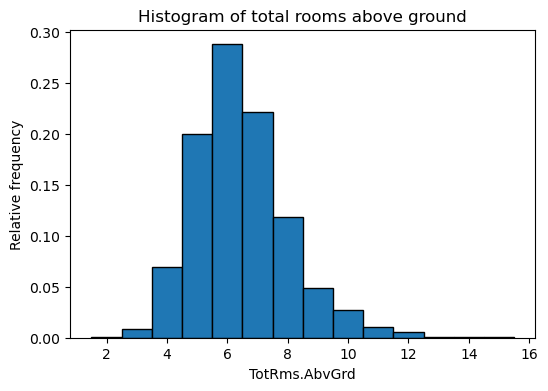

In [17]:
plt.figure(figsize=(6,4))
bins = np.arange(tot_rooms.min(), tot_rooms.max() + 2)  # one bin per count
plt.hist(tot_rooms, bins=bins, density=True, align='left', edgecolor='black')
plt.xlabel('TotRms.AbvGrd')
plt.ylabel('Relative frequency')
plt.title('Histogram of total rooms above ground')
plt.show()

The histogram shows the distribution of total rooms above ground for the homes in the Ames dataset. Most houses have between 5 and 8 rooms, with the peak around 6 rooms. The distribution is right skewed because there are fewer homes with very large room counts. This gives us a quick sense of the typical size of homes before fitting the Poisson model.

This is modeling the number of rooms above ground with a Poisson distribution. This means each house has a count value (like 5 rooms, 6 rooms, ...) and the Poisson model gives the probability of seeing each count based on a single parameter called lambda. If we look at one house, the Poisson model says the chance of seeing its room count depends on lambda raised to that count, multiplied by an exponential term, and divided by the factorial of that count. When we have many houses, we multiply all of those probabilities together. This gives us the likelihood. The likelihood is simply the combined probability of seeing all the room counts in the dataset, assuming the Poisson model is the correct way to describe the data.


In [18]:
lam_hat = tot_rooms.mean()
lam_hat

np.float64(6.443003412969284)

To find the value of lambda that fits the Poisson model best, we maximize the likelihood. For the Poisson distribution, this turns out to be very simple. The value of lambda that makes the data most likely is just the sample mean of the room counts. In other words, the MLE (the maximum likelihood estimate) of lambda is the average number of rooms above ground in the dataset.


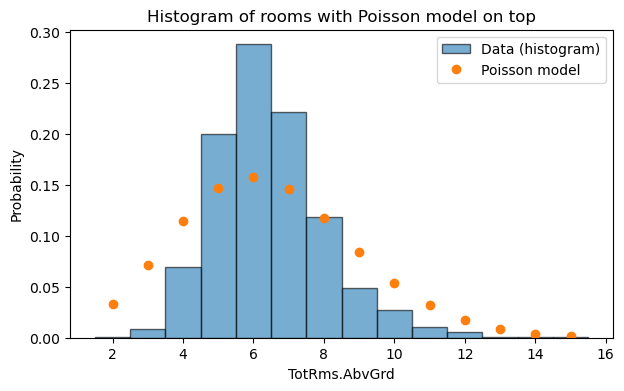

In [19]:
k_vals = np.arange(tot_rooms.min(), tot_rooms.max() + 1)

poisson_pmf = np.array([
    (lam_hat ** k) * np.exp(-lam_hat) / factorial(int(k))
    for k in k_vals
])

plt.figure(figsize=(7, 4))
bins = np.arange(tot_rooms.min(), tot_rooms.max() + 2)
plt.hist(
    tot_rooms,
    bins=bins,
    density=True,
    align='left',
    edgecolor='black',
    alpha=0.6,
    label='Data (histogram)'
)
plt.plot(k_vals, poisson_pmf, marker='o', linestyle='none', label='Poisson model')

plt.xlabel('TotRms.AbvGrd')
plt.ylabel('Probability')
plt.title('Histogram of rooms with Poisson model on top')
plt.legend()
plt.show()


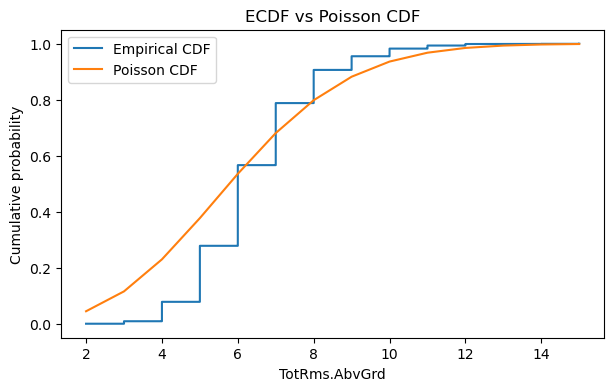

In [ ]:
sorted_x = np.sort(tot_rooms)
ecdf = np.arange(1, len(sorted_x) + 1) / len(sorted_x)
max_k = int(sorted_x.max())
k_grid = np.arange(0, max_k + 1)
pmf_grid = (lam_hat ** k_grid) * np.exp(-lam_hat) / np.array([factorial(int(k)) for k in k_grid])
cdf_grid = pmf_grid.cumsum()

poisson_cdf_vals = cdf_grid[sorted_x.astype(int)]

plt.figure(figsize=(7, 4))
plt.step(sorted_x, ecdf, where='post', label='Empirical CDF')
plt.plot(sorted_x, poisson_cdf_vals, label='Poisson CDF')
plt.xlabel('TotRms.AbvGrd')
plt.ylabel('Cumulative probability')
plt.title('ECDF vs Poisson CDF')
plt.legend()
plt.show()

In [23]:
B = 2000         
n = len(tot_rooms)
rng = np.random.default_rng(42)

boot_lam = np.empty(B)

for b in range(B):
    sample = rng.choice(tot_rooms, size=n, replace=True)


boot_lam.mean(), boot_lam.std()

(np.float64(nan), np.float64(nan))

To study how lambda hat would vary from sample to sample, I used a bootstrap. I drew 2,000 bootstrap samples from the TotRms.AbvGrd values, each sample the same size as the original data and sampled with replacement. For each bootstrap sample, I calculated the mean number of rooms, which gives a new estimate of lambda.

The histogram of the bootstrap estimates is roughly bell shaped and centered near the original estimate of 6.44. This shows that our estimate is fairly stable. The spread of the bootstrap distribution tells us how much sampling variation to expect. Using the 2.5 percent and 97.5 percent points of the bootstrap distribution gives an approximate 95 percent interval for the true average number of rooms above ground in the population

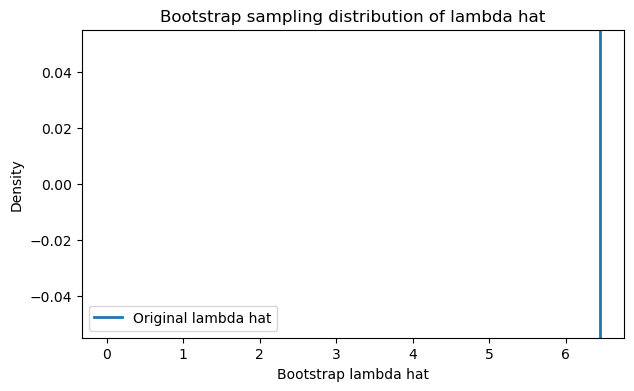

In [24]:
plt.figure(figsize=(7, 4))
plt.hist(boot_lam, bins=30, density=True, edgecolor='black', alpha=0.7)
plt.axvline(lam_hat, linewidth=2, label='Original lambda hat')
plt.xlabel('Bootstrap lambda hat')
plt.ylabel('Density')
plt.title('Bootstrap sampling distribution of lambda hat')
plt.legend()
plt.show()


## 12.
- Open the METABRIC data. Make a histogram of 'Mutation Count' with around 50 bins. Let $Y$ be the mutation count the random variable, and $y_i$ the mutation count for patient $i$.
- We're going to model this using the Poisson Distribution. The probability that $y_i = k$ is given by
$$
pr[y_i = k ] = \frac{ \lambda^k e^{-\lambda} }{k!}
$$
- Write out the likelihood.
- Maximize the likelihood. What is the MLE? (Hint: The sample mean. As usual.)
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameter.